# Week 3 Homework

Utilize the scikit-learn California Housing dataset for the following exercise  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [41]:
import postgresql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

## 1. Download the dataset and build DataFrames for X and y

In [42]:
data = pd.read_csv(r'C:\Users\khalil\ML HW 3\housing.csv')
df = pd.DataFrame(data)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [43]:
df = df.drop('ocean_proximity', axis=1)

In [44]:
df = df.dropna()

In [45]:
x_df = df.drop(columns=['median_house_value'])    
y_df = df[['median_house_value']] 

## 2. Are there columns that look like they need a type change?

In [46]:
import numpy as np
df['median_income'] = df['median_income'].apply(np.ceil) 

In [47]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,9.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,9.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,8.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,6.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,4.0,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,2.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,3.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,2.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,2.0,84700.0


## 3. Split your data into training and testing datasets

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)

## 4. Build a K-NN Regressor and fit it

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(x_train)

# Scale both X_train and X_test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
col_names=['households', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income', 'latitude', 'longitude']
scaled_df = pd.DataFrame(x_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
households,15324.0,-1.610302e-15,1.000033,-2.377025,-1.107537,0.535330,0.779271,2.621273
housing_median_age,15324.0,1.067579e-15,1.000033,-1.441635,-0.796769,-0.642561,0.974278,2.950934
total_rooms,15324.0,1.035889e-16,1.000033,-2.195589,-0.845355,0.028326,0.663730,1.855112
total_bedrooms,15324.0,-8.302764e-17,1.000033,-1.197230,-0.539542,-0.230095,0.230994,16.746109
population,15324.0,1.298448e-16,1.000033,-1.269033,-0.571998,-0.240077,0.257805,14.008829
median_income,15324.0,-3.032030e-17,1.000033,-1.244233,-0.559799,-0.225479,0.264154,30.061606
latitude,15324.0,6.661773e-17,1.000033,-1.297462,-0.572129,-0.230336,0.273222,14.568532
longitude,15324.0,-1.156301e-17,1.000033,-1.774791,-0.687074,-0.176267,0.457466,5.868584


In [52]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [53]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [82]:
y_pred1 = regressor.predict(x_test)
y_pred1

array([[157660. ],
       [160340. ],
       [ 79160. ],
       ...,
       [155660. ],
       [271870. ],
       [364550.2]])

In [83]:
#Accuracy
regressor.score(x_test, y_test)

0.7267937780493074

## 5. Try several different parameter values, especially for number of neighbors.  Keep the optimal result that you encounter while testing.

In [84]:
regressor = KNeighborsRegressor(n_neighbors=10)
regressor.fit(x_train, y_train)
y_pred2 = regressor.predict(x_test)
regressor.score(x_test, y_test)

0.7267937780493074

In [85]:
regressor = KNeighborsRegressor(n_neighbors=15)
regressor.fit(x_train, y_train)
y_pred3 = regressor.predict(x_test)
regressor.score(x_test, y_test)

0.729826947535694

In [86]:
regressor = KNeighborsRegressor(n_neighbors=20)
regressor.fit(x_train, y_train)
y_pred4 = regressor.predict(x_test)
regressor.score(x_test, y_test)

0.7276310934302839

## 6. Determing model accuracy or efficacy is slightly harder with a regression.  What is your mean absolute error from the model (keep in mind the age of the dataset when thinking about prices)?

In [87]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')

mae: 41167.71706791936


## 7. Chart your predictions vs the actuals.

Text(0, 0.5, 'House Prices')

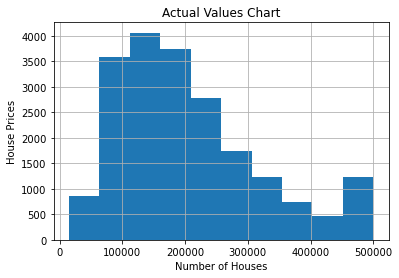

In [93]:
df["median_house_value"].hist()

plt.title('Actual Values Chart')
plt.xlabel('Number of Houses')
plt.ylabel('House Prices')

Text(0, 0.5, 'Accuracy')

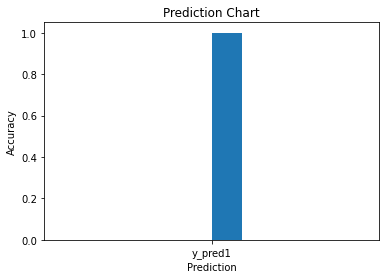

In [92]:
plt.hist(["y_pred1"])  

plt.title('Prediction Chart')
plt.xlabel('Prediction')
plt.ylabel('Accuracy')

In [ ]:
plt